In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


In [2]:
from ising import Isingmodel

/Users/danielmiksch/miniconda3/envs/juplab/lib/python3.10/site-packages/numba/core/decorators.py:282: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/Users/danielmiksch/miniconda3/envs/juplab/lib/python3.10/site-packages/numba/core/decorators.py:282: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [35]:
mag10 = np.load('data/mag10.npy')
mag20 = np.load('data/mag20.npy')
mag30 = np.load('data/mag30.npy')
mag50 = np.load('data/mag50.npy')
mag200 = np.load('data/mag200.npy')
sus10 = np.load('data/sus10.npy')
sus20 = np.load('data/sus20.npy')
sus30 = np.load('data/sus30.npy')
sus50 = np.load('data/sus50.npy')
sus200 = np.load('data/sus200.npy')

In [4]:
def log_interp1d(xx, yy, kind='quadratic'):
    logx = np.log10(xx)
    logy = np.log10(yy)
    lin_interp = interp1d(logx, logy, kind=kind)
    log_interp = lambda zz: np.power(10.0, lin_interp(np.log10(zz)))
    return log_interp

In [5]:
betas = np.linspace(0.3, 0.7, 60)
betas1 = np.linspace(0.3, 0.7, 100)
betas2 = np.linspace(0.3, 0.7, 80)
S = [50]
steps = [16000 for i in S]
sweeps = [12000 for i in S]
model = Isingmodel()

In [36]:
interp10 = interp1d(betas, mag10[0], kind='quadratic')
interp20 = interp1d(betas, mag20[0], kind='quadratic')
interp30 = interp1d(betas, mag30[0], kind='quadratic')
interp50 = interp1d(betas, mag50[0], kind='quadratic')
interp200 = interp1d(betas1, mag200[0], kind='quadratic')

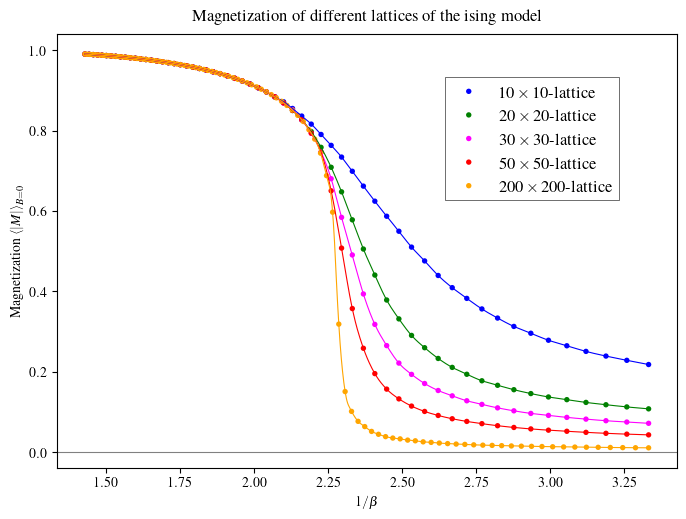

In [39]:
fig, ax = plt.subplots(figsize=(8, (9/16)*10), dpi=100)

plt.rcParams["font.family"] = "times"
plt.rcParams["text.usetex"] = True

x = np.linspace(0.3, 0.7, 1000)

ax.plot(1 / x, interp10(x), c='blue', linewidth=.8, label='', zorder=2)
ax.plot(1 / x, interp20(x), c='green', linewidth=.8, label='', zorder=2)
ax.plot(1 / x, interp30(x), c='magenta', linewidth=.8, label='', zorder=2)
ax.plot(1 / x, interp50(x), c='red', linewidth=.8, label='', zorder=2)
# ax.plot(1 / x, interp80(x), c='orange', linewidth=.8, label='', zorder=2)
ax.plot(1 / x, interp200(x), c='orange', linewidth=.8, label='', zorder=2)

# ax.scatter(1/betas, mag20_new[0], label=r'$20\times 20$-lattice', marker='.', s=80, edgecolors='none', color='red')
ax.scatter(1/betas, mag10[0], label=r'$10\times 10$-lattice', marker='.', s=60, edgecolors='none', color='blue')
ax.scatter(1 / betas, mag20[0], label=r'$20\times 20$-lattice', marker='.', s=60, edgecolors='none', color='green')
ax.scatter(1 / betas, mag30[0], label=r'$30\times 30$-lattice', marker='.', s=60, edgecolors='none', color='magenta')
ax.scatter(1 / betas, mag50[0], label=r'$50\times 50$-lattice', marker='.', s=60, edgecolors='none', color='red')
ax.scatter(1 / betas1, mag200[0], label=r'$200\times 200$-lattice', marker='.', s=60, edgecolors='none', color='orange')
# ax.scatter(1 / betas, mag200[0], label=r'$200\times 200$-lattice', marker='.', s=60, edgecolors='none', color='dodgerblue')


ax.axhline(0, c='grey', linewidth=.8)
ax.set_xlabel(r'$1/\beta$')
ax.set_ylabel(r'Magnetization $\langle|M|\rangle_{B=0}$')
plt.title('Magnetization of different lattices of the ising model', fontsize=12, pad=10)

legend = ax.legend(loc="upper right", bbox_to_anchor=(0.92, 0.92), fancybox=False, edgecolor='black', fontsize=12)
legend.set_zorder(10)
legend.get_frame().set_linewidth(0.5)

plt.show()

# fig.savefig(f"/Users/danielmiksch/Downloads/magnetizationAll.pdf")

In [26]:
iSus10 = log_interp1d(betas, sus10[0], kind='quadratic')
iSus20 = log_interp1d(betas, sus20[0], kind='quadratic')
iSus30 = log_interp1d(betas, sus30[0], kind='quadratic')
iSus50 = log_interp1d(betas2, sus50[0], kind='quadratic')
iSus200 = log_interp1d(betas1, sus200[0], kind='quadratic')

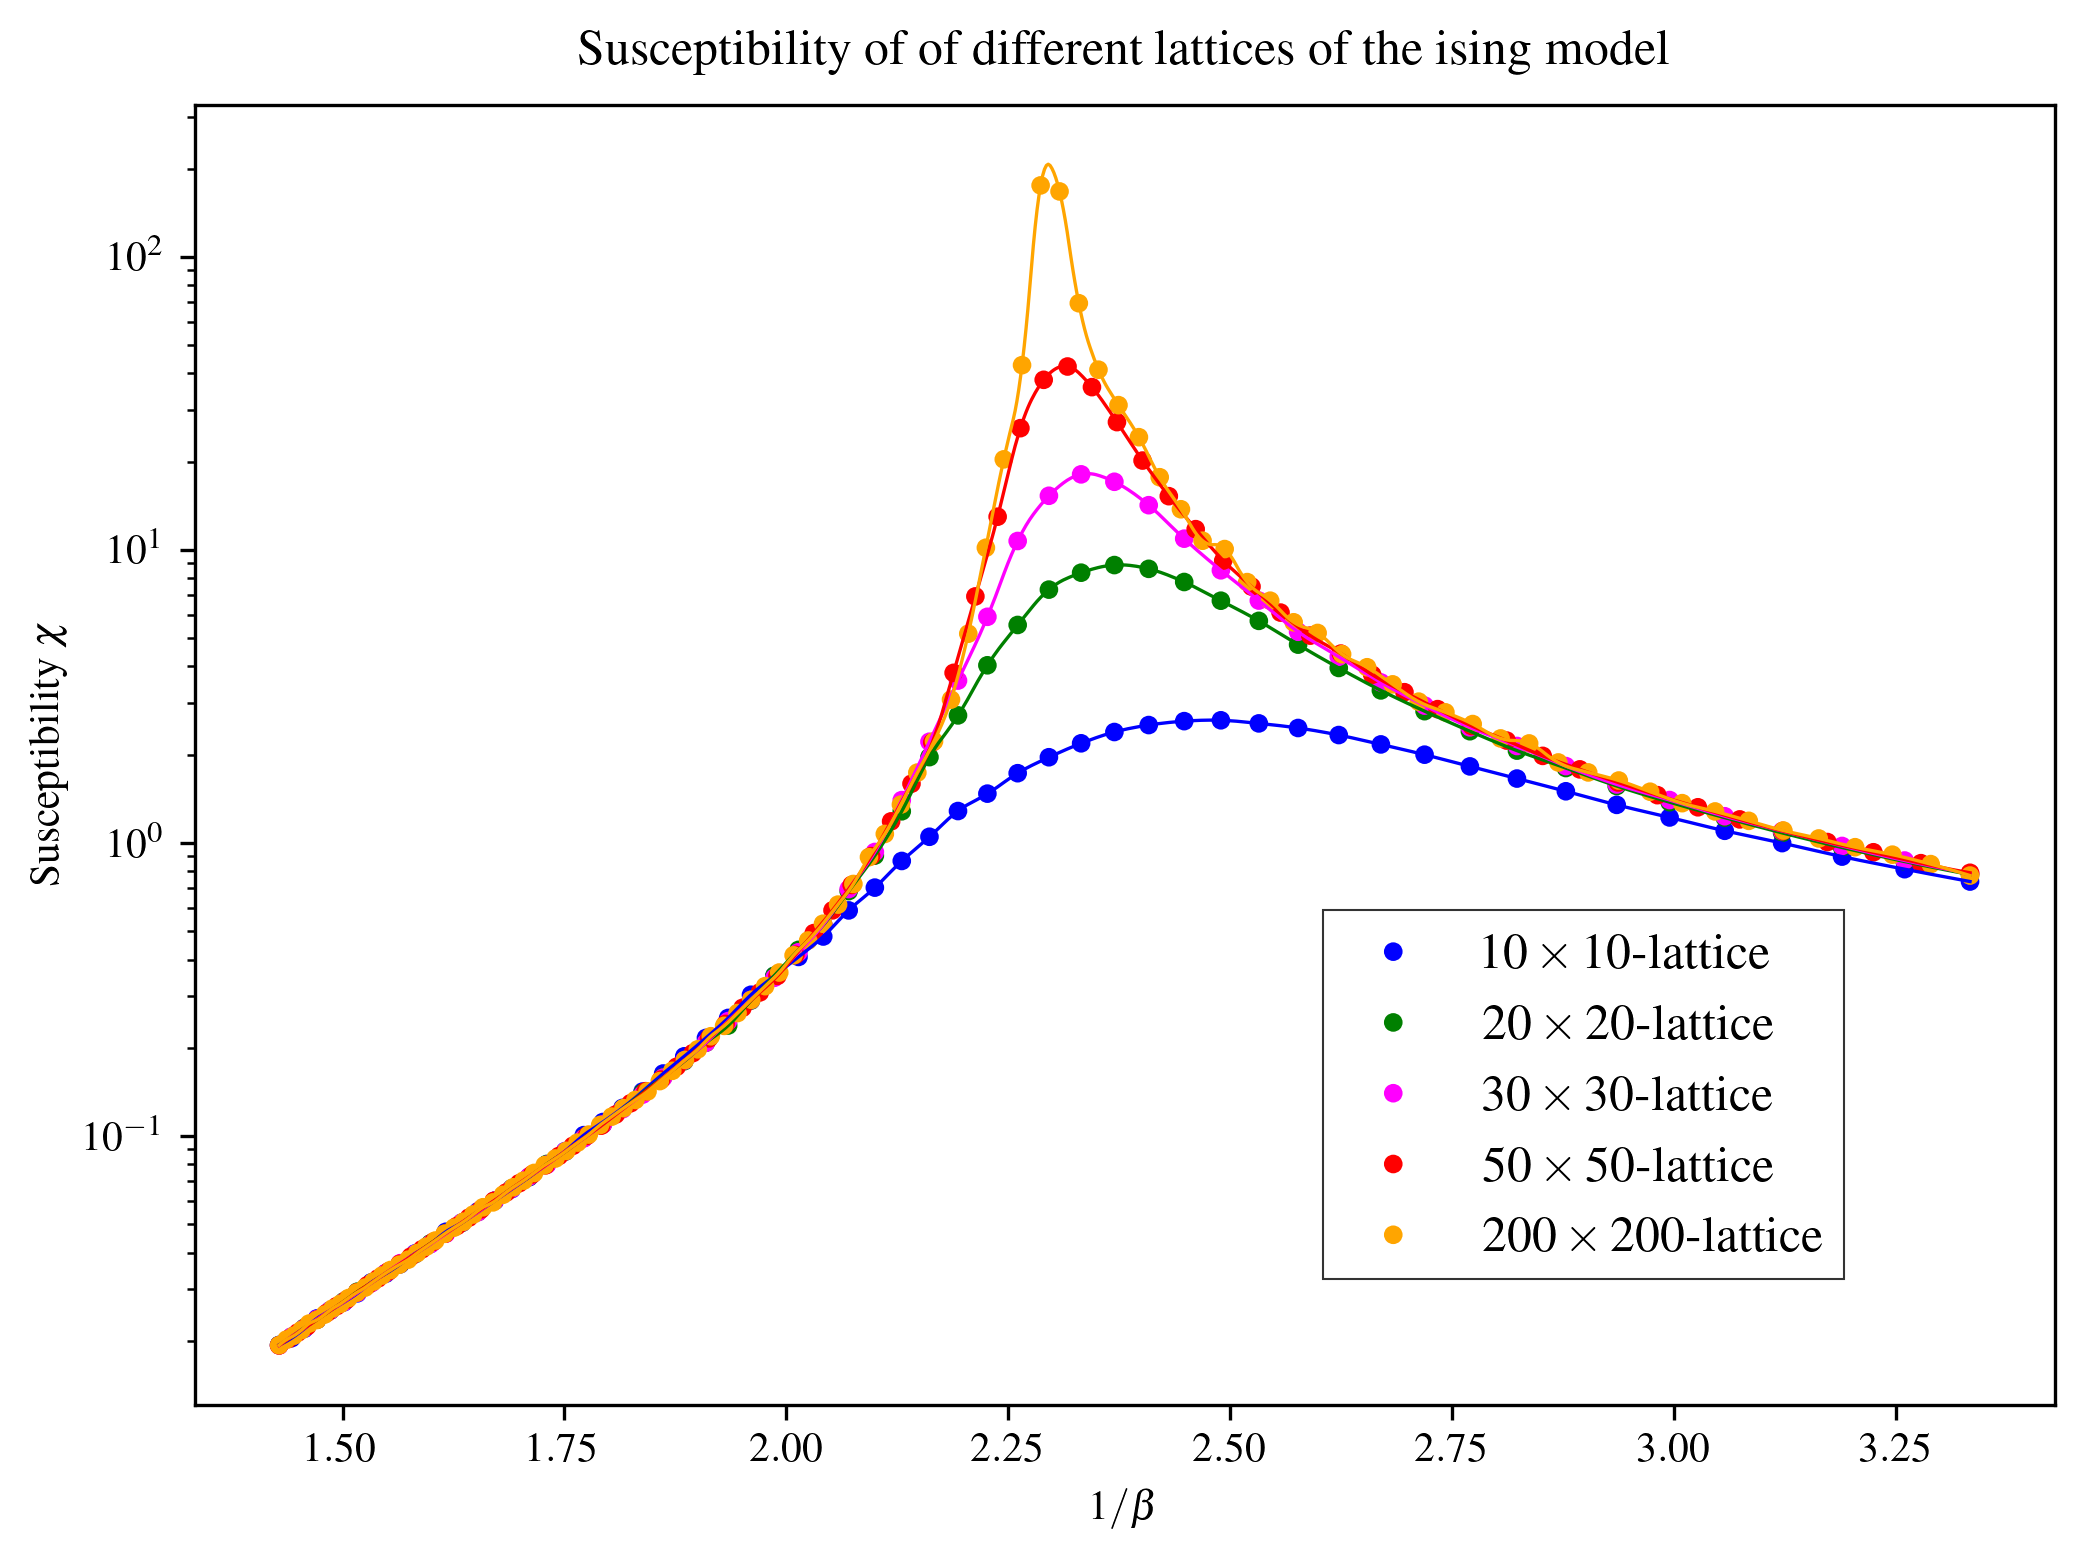

In [40]:
fig, ax = plt.subplots(figsize=(8, (9/16)*10), dpi=300)

x = np.linspace(0.3, 0.7, 1000)

ax.plot(1 / x, iSus10(x), c='blue', linewidth=.8, label='', zorder=2)
ax.plot(1 / x, iSus20(x), c='green', linewidth=.8, label='', zorder=2)
ax.plot(1 / x, iSus30(x), c='magenta', linewidth=.8, label='', zorder=2)
ax.plot(1 / x, iSus50(x), c='red', linewidth=.8, label='', zorder=2)
ax.plot(1 / x, iSus200(x), c='orange', linewidth=.8, label='', zorder=2)

ax.scatter(1 / betas, sus10[0], label=r'$10\times 10$-lattice', marker='.', s=80, edgecolors='none', color='blue')
ax.scatter(1 / betas, sus20[0], label=r'$20\times 20$-lattice', marker='.', s=80, edgecolors='none', color='green')
ax.scatter(1 / betas, sus30[0], label=r'$30\times 30$-lattice', marker='.', s=80, edgecolors='none', color='magenta')
ax.scatter(1 / betas2, sus50[0], label=r'$50\times 50$-lattice', marker='.', s=80, edgecolors='none', color='red')
ax.scatter(1 / betas1, sus200[0], label=r'$200\times 200$-lattice', marker='.', s=80, edgecolors='none', color='orange')
ax.set_yscale('log')

ax.set_xlabel(r'$1/\beta$')
ax.set_ylabel(r'Susceptibility $\chi$')
plt.title(r'Susceptibility of of different lattices of the ising model', fontsize=12, pad=10)

legend = ax.legend(loc="upper right", bbox_to_anchor=(0.9, 0.4), fancybox=False, edgecolor='black', fontsize=12)
legend.set_zorder(10)
legend.get_frame().set_linewidth(0.5)

plt.show()

# fig.savefig(f"/Users/danielmiksch/Downloads/susceptibilityAll.pdf")

In [41]:
test = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [52]:
test[:,0]

array([1, 4, 7])